    Color  Size  Act  Age  Class
0       1     1    1    0      1
1       1     1    1    1      1
2       1     1    0    0      1
3       1     1    0    1      1
4       1     1    1    0      1
5       1     1    1    1      1
6       1     1    0    0      1
7       1     1    0    1      1
8       1     0    1    0      0
9       1     0    1    1      0
10      1     0    0    0      0
11      1     0    0    1      0
12      0     1    1    0      0
13      0     1    1    1      0
14      0     1    0    0      0
15      0     1    0    1      0
16      0     0    1    0      0
17      0     0    1    1      0
18      0     0    0    0      0
19      0     0    0    1      0
One hot codificado: 
    Color_0  Color_1  Size_0  Size_1  Act_0  Act_1  Age_0  Age_1 Class
0     False     True   False    True  False   True   True  False     1
1     False     True   False    True  False   True  False   True     1
2     False     True   False    True   True  False   True  False     1
3 

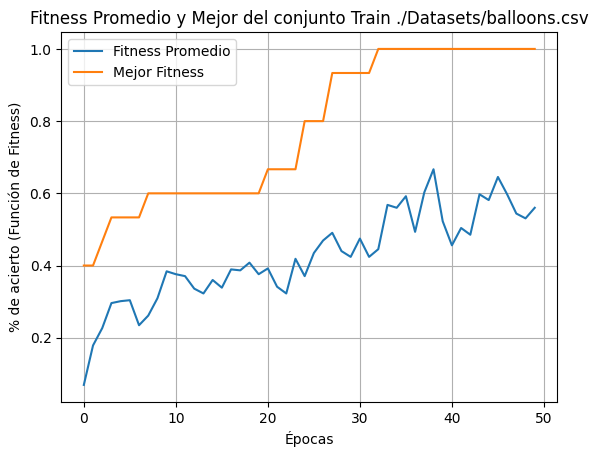

      Pclass  Sex  Age  Class
0          2    1    3      1
1          2    1    6      1
2          3    0    4      0
3          3    0    0      0
4          1    1    9      1
...      ...  ...  ...    ...
1041       3    1    3      0
1042       3    1    8      0
1043       3    0    4      1
1044       3    1    4      0
1045       2    1    3      0

[1046 rows x 4 columns]
One hot codificado: 
      Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  Age_0  Age_1  Age_2  Age_3  \
0        False      True     False  False   True  False  False  False   True   
1        False      True     False  False   True  False  False  False  False   
2        False     False      True   True  False  False  False  False  False   
3        False     False      True   True  False   True  False  False  False   
4         True     False     False  False   True  False  False  False  False   
...        ...       ...       ...    ...    ...    ...    ...    ...    ...   
1041     False     False      True

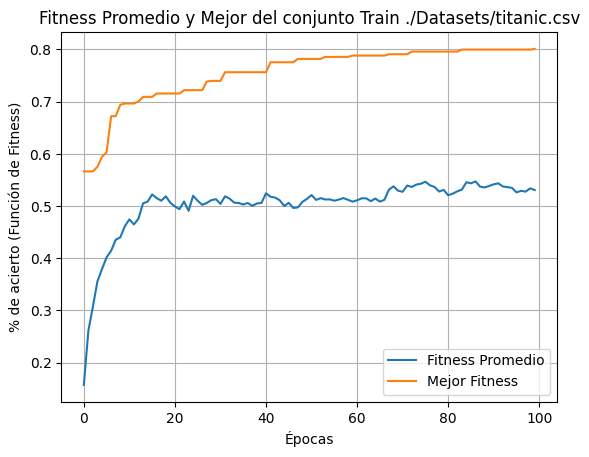

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from Datos import Datos
from Datos import codificacion_one_hot
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
from Clasificador import Clasificador
from ClasificadorAlgoritmoGenetico import ClasificadorAlgoritmoGenetico

datasets = ['./Datasets/balloons.csv', './Datasets/titanic.csv']

for dataset_name in datasets:

    if dataset_name == './Datasets/balloons.csv':
        poblacion = 25
        epochs = 50
        max_reglas = 3
    else:
        poblacion = 100
        epochs = 100
        max_reglas = 5
        
    datos = Datos(dataset_name)
    
    cols = datos.datos.columns 
    atributos_unicos = []
    print(f"Dataset: \n{datos.datos}")
    
    for col in cols:
        if col == 'Class':
            break
        atributos_unicos.append(len(np.unique(datos.datos[col])))
    
    datos.datos = codificacion_one_hot(datos.datos)
    print(f"Dataset One hot codificado: \n{datos.datos}")
    
    seed = 42
    
    simple = ValidacionSimple(1)
    indices = simple.creaParticiones(datos.datos, seed=seed)
    
    indices_train = indices[0].indicesTrain
    indices_test = indices[0].indicesTest
    
    datosTrain = datos.extraeDatos(indices_train)
    datosTest = datos.extraeDatos(indices_test)

    clf = ClasificadorAlgoritmoGenetico(poblacion_size=poblacion, max_reglas=max_reglas, epochs=epochs, pmut=0.02, elitismo=0.02, atributos_unicos=atributos_unicos, seed=seed)
    fitness_medio_list, mejor_fitness_list = clf.entrenamiento(datosTrain)
    fitness_test = clf.clasifica(datosTest)
    
    plt.plot(range(epochs), fitness_medio_list, label="Fitness Promedio")
    plt.plot(range(epochs), mejor_fitness_list, label="Mejor Fitness")
    plt.title(f"Fitness Promedio y Mejor del conjunto Train {dataset_name}")
    plt.xlabel("Épocas")
    plt.ylabel("% de acierto (Función de Fitness)")
    plt.grid()
    plt.legend()
    plt.show()


# Apartado 1

Breve descripción de algunos detalles de la implementación.
Solo es necesario especificar los siguientes aspectos:
a) Mecanismo/s de cruce implementado
b) Mecanismo/s de mutación implementado

Se ha implementado un mecanismo de cruce intra-reglas, donde se elige aleatoriamente una regla de cada progenitor y un punto de cruce. El punto de cruce determina que parte de las reglas que se intercambiarán entre los progenitores, en concreto, todo lo que quede a la derecha del punto de cruce será intercambiado entre los progenitores, y para mantener la semántica se establece la misma posición del punto de cruce para ambas reglas.

Para el mecanismo de mutación se ha implimentado una mutación estándar aplicada a todas las reglas, es decir para todas las reglas de individuo se reccoren bit a bit aplicando una mutación (cambiando el valor del bit) según una probabilidad dada.

# Apartado 2

Resultados de la clasificación para cada uno de los dos conjuntos
de prueba. Indicar con qué combinación de
individuos/generaciones se consigue el mejor resultado.
Además del porcentaje de acierto o error, deberá incluirse en
el notebook el conjunto de reglas correspondiente al mejor
individuo, así como una interpretación del significado de
dichas reglas.

DATASET BALLOONS.CSV:

Configuración de parámetros:

Tamaño de la población: 25 individuos
Número de generaciones: 50
Número máximo de reglas por individuo: 3

El algoritmo genético logra un fitness del 100% tanto en el conjunto de test como en el de entrenamiento. Este resultado indica que el mejor conjunto de reglas que se ha obtenido es capaz de clasificar a la perfección todas las instancias del dataset. Esto se debe a que el conjunto de datos propuesto es simple, con características nnominales y una estructura linealmente separable, lo que facilita encontrar un conjunto de reglas óptimo que genere una clasificación perfecta.

Conjunto de reglas (Mejor Individuo):
El mejor individuo generado por el algoritmo genético para el conjunto balloons consta de las siguientes reglas:

Regla 1: bitarray('011011110')
Regla 2: bitarray('101111110')
Regla 3: bitarray('010111111')

Cada bit de estas reglas representa la activación de un atributo del dataset tras ser codificado con one-hot encoding, excepto el último bit, que indica la clase predicha.

Tras aplicar el esquema de one-hot encoding, el dataset queda estructurado de la siguiente manera: Color_0 (PURPLE), Color_1 (YELLOW), Size_0 (LARGE), Size_1 (SMALL), Act_0 (DIP), Act_1 (STRECH), Age_0 (ADULT), Age_1 (CHILD), Class (1 = T; 0 = F). Cada bit en una regla indica si la condición asociada es verdadera "1" o no "0". La interpretación de estas reglas es la siguiente:

La primera regla clasifica las instancias en la clase F. Para que sea válida, el color del globo debe ser YELLOW (Color_1 activo y Color_0 inactivo) y el tamaño debe ser LARGE (Size_0 activo y Size_1 inactivo), mientras que el resto pueden tener cualquier valor ya que  tanto Act_0 como Act_1 y Age_0 como Age_1 están activos. Esto coincide con las filas del dataset donde el color es YELLOW, el tamaño es LARGE y la clase es F, si analizamos el dataset podemos ver que todas las filas con YELLOW y LARGE son clase F.

La segunda regla también clasifica en la clase F. En este caso, el color del globo debe ser PURPLE (Color_0 activo y Color_1 inactivo), el resto de atributos son indiferentes ya que todos se activan. Esto implica que los globos PURPLE también se clasifican en la clase F, e igual que en el caso anterior tenemos que todas las filas con PURPLE se clasifican en F.

La tercera regla clasifica las instancias en la clase T. Aquí, el color del globo debe ser YELLOW (Color_1 activo y Color_0 inactivo), mientras que el tamaño debe ser SMALL (Size_0 inactivo y Size_1 activo) y el resto de atributos son irrelevantes. Esto significa que los globos YELLOW y SMALL se clasifican en la clase T, nuevamente observando el dataset vemos como todas las filas con YELLOW y SMALL son de la clase T.

De esta forma vemos como se han generado 3 reglas que consiguen separar los datos en función de los atributos de color y tamaño.

DATASET TITANIC.CSV:

Configuración de parámetros:

Tamaño de la población: 100 individuos
Número de generaciones: 100
Número máximo de reglas por individuo: 5
(Es probable que para un mayor número de reglas, generaciones e individuos se obtenga un mejor resultado, pero está mejora será mínima y el coste computacional demasiado grande)

En comparación con el anterior dataset, podemos observar un aumento de complejidad tanto en la cantidad de datos que se nos presentan como en las relaciones entre los atributos. En este caso, el algoritmo genético logró un porcentaje de acierto relativamente alto para un problema más complejo como el de Titanic. El fitness obtenido fue del 80.1% para el conjunto de entrenamiento y 79,4% en el conjunto de validación. 

Conjunto de reglas (Mejor Individuo):

Tras aplicar el esquema de one-hot encoding, el dataset queda estructurado de la siguiente manera: Pclass_1 (1), Pclass_2 (2), Pclass_3 (3), Sex_0 (female), Sex_1 (male), Age_0, Age_1 ... Age_14, Age_15 (0, 1 .. 14, 15) Class (0, 1). Cada bit en una regla indica si la condición asociada es verdadera "1" o no "0". La interpretación de estas reglas es la siguiente:

El mejor individuo generado por el algoritmo genético para el conjunto titanic consta de las siguientes reglas:

Regla 1: bitarray('1110100101101111110000')
Regla 2: bitarray('0110100010111111011110')
Regla 3: bitarray('1010110011001111111100')
Regla 4: bitarray('0011000010111101011110')
Regla 5: bitarray('1111111111111111111011')

La primera regla captura a todos los individuos sin importar su clase, ya que activan los bits correspondientes a Pclass_1, Pclass_2 y Pclass_3, con lo cual es indiferente a este atributo. Sin embargo, la regla sí se aplica exclusivamente a hombres (Sex_0 inactivo y Sex_1 activo), y a aquellos en rangos de edad comprendidos entre 10 y 60 años, aunque con algunas exclusiones intermedias en estos intervalos. Estos individuos son clasificados como 0, es decir, como no supervivientes. Esto indica que los hombres de cualquier clase social y con edades entre 10 y 60 años tenían una mayor probabilidad de morir, independientemente de otros factores.

La segunda regla captura un patrón similar, pero excluye a los individuos de primera clase, (Pclass_2 y Pclass_3 activos y Pclass_1 inactivo). Además, considera un rango de edad con menos exclusiones dentro del intervalo de 10 a 60 años. Esta regla resalta que los hombres pertenecientes a clases bajas o medias tenían un riesgo significativamente mayor de morir en comparación con los hombres de primera clase.

La tercera regla vuelve a representar lo mismo que la primera, pero excluyendo a los individuos de la segunda clase, con lo cual ejerce todavía más presión sobre los individuos hombre de tercera clase y de primera clase.

La cuarta regla cambia de enfoque e incluye a mujeres (Sex_0 activo y Sex_1 inactivo) restringiéndose a aquellas pertenecientes exclusivamente a la tercera clase (Pclass_3 activo, con Pclass_1 y Pclass_2 inactivos) y con edades superiores a 20 años. Estas mujeres son clasificadas como 0, es decir, como no supervivientes. Este patrón destaca que las mujeres de la clase más baja enfrentaron mayores dificultades para sobrevivir en comparación con las de clases superiores.

Estas cuatro reglas capturan combinaciones asociadas a las mayores probabilidades de mortalidad, destacando una fuerte presión sobre los hombres de todas las clases, especialmente aquellos en clases bajas o medias y en rangos de edad amplios. Aunque los hombres de primera clase también están incluidos en estas reglas, la presión sobre ellos es menor, ya que están representados en menos reglas en comparación con los de clases inferiores. Por otro lado, las mujeres de la tercera clase tienen una mayor presión que las mujeres de primera y segunda clase, ya que la cuarta regla es la única que las incluye y las clasifica como no supervivientes. 

La quinta regla captura a los individuos que sobrevivieron, independientemente de su clase, edad o sexo, clasificándolos como 1. Al ser la única regla que clasifica como supervivientes, su influencia en la predicción es limitada, ya que las otras reglas que clasifican como 0 pueden activarse simultáneamente. Además, en nuestra implementación en caso de empate entre las reglas, se asigna la clase 0 como predicción por defecto, lo que reduce aún más la influencia de esta quinta regla.

En conclusión la combinación de estas 5 reglas consiguen capturar los patrones generales para la clasificación de los individuos según sus atributos y concuerdan con la situación histórica del Titanic.


# Apartado 3

Análisis de resultados: importancia del número de reglas, tamaño de la población, generaciones.

En general:

Importancia del Número de Reglas

El número de reglas es clave para capturar las relaciones entre los atributos del dataset, si el número de reglas es demasiado alto, puede llevar a sobreajuste y mayor uso de recursos; y si es demasiado bajo, el algoritmo puede no capturar suficiente complejidad y pierde capacidad de generalización.

Importancia del Tamaño de la Población

El tamaño de la población influye en la diversidad genética del algoritmo, afectando su capacidad para explorar el espacio de soluciones de manera efectiva. Un tamaño adecuado permite una búsqueda más amplia y mejora la calidad de las soluciones. Tanto un aumento como una disminución excesiva en el tamaño de la población pueden impactar negativamente en el rendimiento de clasificación.

Importancia del Número de Generaciones

El número de generaciones determina el número de iteraciones disponibles para que el algoritmo evolucione y mejore sus soluciones. Un número insuficiente de generaciones puede impedir que el algoritmo converga y alcance su mejor solución, mientras que un número excesivo no siempre mejora los resultados y puede generar un uso innecesario de recursos computacionales.

DATASET BALLOONS.CSV:

Número de reglas

Dada la simplicidad del conjunto de datos, un número pequeño de reglas es suficiente para cubrir todo el espacio de hipótesis y obtener un rendimiento perfecto. En este caso, 3 reglas fueron las óptimas, ya que el espacio de combinaciones posibles es limitado. Si aumentamos el número de reglas, observamos un incremento en el coste computacional sin obtener beneficios significativos, ya que las reglas adicionales son redundantes y causan sobreajuste. Por otro lado, reducir el número de reglas afecta negativamente a la variabilidad del modelo, lo que impedide que el algoritmo converga a una solución óptima. Por lo tanto, 3 reglas fueron suficientes para resolver el problema sin generar complicaciones.

Tamaño de población

En este caso, una población de 25 individuos es adecuada, ya que el conjunto de datos es simple y el espacio de búsqueda no es tan extenso. Esta población permite una suficiente diversidad inicial y exploración del espacio de soluciones, sin consumir recursos computacionales innecesarios. Con este tamaño de población, el algoritmo converge rápidamente sin necesidad de ampliar la población. Aumentar el tamaño de la población no produce una mejora importante de los resultados e incrementa considerablemente el coste computacional sin aportar valor significativo al proceso evolutivo.

Generaciones

Con 50 generaciones, el algoritmo logra alcanzar un fitness óptimo rápidamente, reducir mucho el número de generaciones impide que el algoritmo alcance el máximo rendimiento, ya que no habría tenido tiempo suficiente para evolucionar adecuadamente hacia la solución óptima. Por ende 50 generaciones son suficientes para que el algoritmo encuentre la solución más adecuada en este problema simple.

DATASET TITANIC.CSV:

Número de reglas

Para el conjunto Titanic, se necesita un número mayor de reglas debido a la mayor complejidad del dataset. Con 5 reglas, el algoritmo pudo capturar más patrones complejos relacionados con las interacciones entre los atributos. Aunque un mayor número de reglas puede aumentar ligeramente el rendimiento en este caso, el uso de recursos computacionales aumenta considerablemente, por otro lado, reducir el número de reglas disminuye la capacidad del algoritmo para representar adecuadamente estas interacciones y afecta negativamente al rendimiento. El fitness alcanzado con 5 reglas es de 79.4% (en test), lo cual indica que con esta cantidad de reglas el modelo es capaz de generalizar sin caer en el sobreajuste.

Tamaño de población

Dado que el dataset Titanic es mucho más complejo, aumentar el tamaño de la población a 100 individuos es esencial para asegurar que el algoritmo explore el espacio de soluciones de manera efectiva. Con esta población, se logró suficiente diversidad genética para evitar la convergencia en los primeros pasos y la pérdida de soluciones potenciales. Si reducimos el tamaño de la población la falta de diversidad genética limita la capacidad del algoritmo para explorar todas las soluciones posibles y mejorar su rendimiento. Por lo tanto, 100 individuos es el valor adecuado para este conjunto de datos, proporcionando un buen balance entre recursos computacionales y capacidad de exploración.

Generaciones

En esta caso podríamos elegir un menor número de generaciones al establecido ya que el algorimto alcanza una solución buena a partir de las 65 generaciones y tras esto la clasificación mejora pero marginalmente, sin embargo, esto no ocurre con todas las seeds y en algunas ocasiones converge alrededor de las 80 generaciones.

# Apartado 4

Solo para la fase de entrenamiento, evolución en forma de gráfica:


a) Del fitness del mejor individuo de la población

b) Del fitness medio de la población

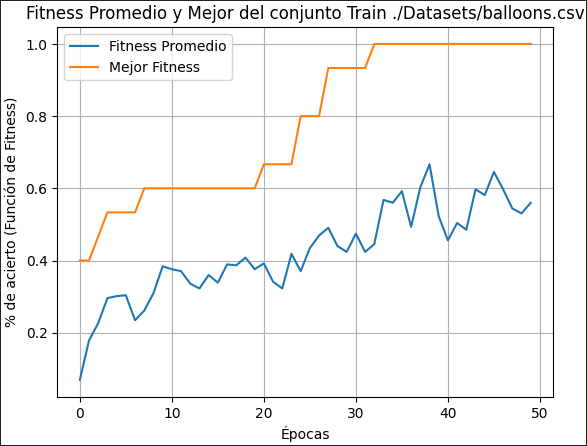

Podemos observar cómo el fitness del mejor individuo va aumentando rapidamente durante las primeras generaciones hasta aproximadamente la 20. Es muy típico en problemas sencillos, ya que al ser un espacio de hipótesis limitado, el algoritmo es capaz de encontrar rapidamente la solución óptima.

En cuato a la media de los individuos, podemos observar una mejora constante en la calidad general de los individuos de la población.
Hacia las últimas generaciones, podemos observar una ligera estabilización, lo que indica que la diversidad de la población disminuye a medida que los individuos convergen hacia soluciones similares.

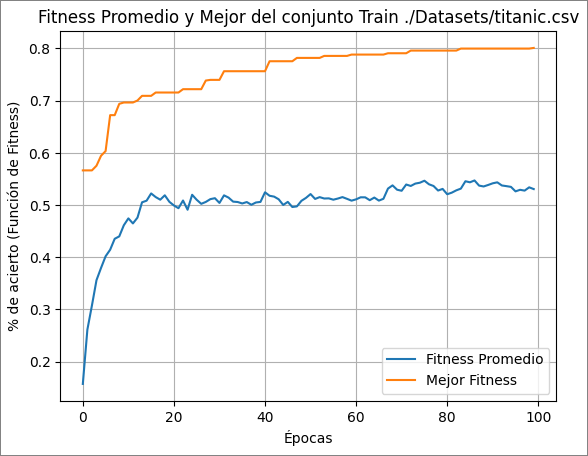

Por último, analizaremos el dataset Titanic. 

En cuanto al fitness del mejor individuo:


La línea naranja muestraPodemos observar un aumento constante y progresivo en cuanto al fitness del mejor individuo, este aumento es notable hasta cerca del final de las generaciones donde el progreso pasa a ser menor. 


Este incremento más lento en comparación con balloons se debe a la mayor complejidad del problema, que requiere más generaciones para encontrar soluciones óptimas.

En cuanto al fitness promedio de la población, la línea azul indica un crecimiento más moderado en el fitness promedio, estabilizándose alrededor del 50% después de las primeras generaciones.

La diferencia entre el fitness promedio y el del mejor individuo refleja una mayor diversidad en la población, lo cual es útil para explorar soluciones, pero también indica que muchos individuos no contribuyen significativamente al fitness general.
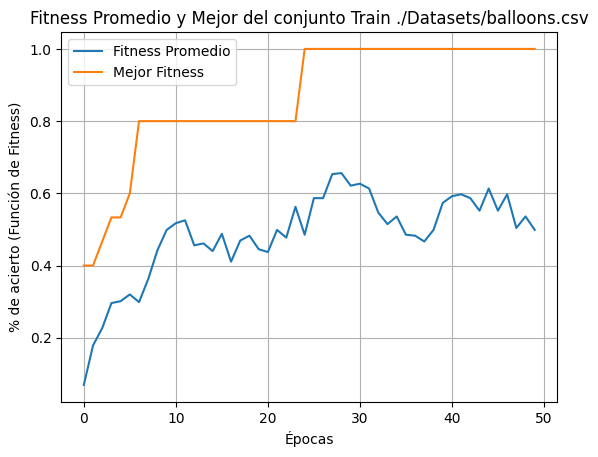